In [9]:
import pandas as pd

ruta_corpus_filtrado = f"../Documentos/CorpusCompleto/CorpusCompleto.csv"
corpus = pd.read_csv(ruta_corpus_filtrado)

In [10]:
corpus

Abstract  Clasificacion
0    smooth muscle alpha actin and myosin heavy cha...              0
1    the common denominator is impaired beta-cateni...              1
2    genetic dissection of drosophila myofibril for...              0
3    significantly, those actin mutants exhibiting ...              1
4    electrical stimulation of cardiocyte contracti...              0
..                                                 ...            ...
883  we have studied the effects of neomycin, a pot...              1
884  taken together, the results support the idea t...              1
885  the class includes asia form bacteriophage t4,...              1
886  the first stage, which involves the phosphatas...              1
887  the sigma w regulon includes a penicillin bind...              1

[888 rows x 2 columns]

In [5]:
import json

f = open('corpus_completo.json')
  
data_corpus = json.load(f)

In [41]:
def InfoAbstract(abstract):
    info = None
    for i in data_corpus:
        if i["text"].lower() == abstract:
            info =  i
    return info 

def Relacion(info):
    listado = []
    for relacion in info["l_relation"]:
        
        anotacion1 = [ anota  for anota in info["l_annotation"] if  anota['id'] == relacion['Arg1'] ][0]['text'].lower()
        anotacion2 = [ anota  for anota in info["l_annotation"] if  anota['id'] == relacion['Arg2'] ][0]['text'].lower()
        
        listado.append((anotacion1, anotacion2))
        
    return listado

In [87]:
import os
from itertools import combinations

ruta_palabras = f"../Documentos/CorpusCompleto/Palabras/"
ruta_prot = f"../Documentos/CorpusCompleto/Proteinas"


listado_abstract = []

for index, abstract in enumerate(corpus["Abstract"]):
    
    f_prot = pd.read_csv(f"{ruta_prot}/{index}")
    f_palabras = pd.read_csv(f"{ruta_palabras}/{index}")
    
    info = InfoAbstract(abstract = abstract)
    
    relaciones = []
    
    if corpus["Clasificacion"][index] == 1:
        relaciones = Relacion(info)
        
    temp = combinations(f_prot["text"]  , 2)
    
    for i in list(temp):
        clasificacion = i in relaciones 
        index_prot1 = abstract.find(i[0])
        if i[0] == i[1]:
            index_prot2 = abstract.find(i[0], abstract.find(i[1]) + 1)
        else:
            index_prot2 = abstract.find(i[1])
            
            if index_prot2 < index_prot1:
                index_prot2 = abstract.find(i[1], abstract.find(i[1]) + 1)
        #segmento =  abstract[index_prot1: index_prot2 + len(i[1]) ]
        segmento =  abstract
        segmento =  segmento.replace(i[0],"PROT1")
        if i[0] == i[1]:
            index_p = segmento.find("PROT1", segmento.find("PROT1") + 1)
            segmento = segmento[0:index_p]
            segmento = segmento + "PROT2"
        segmento =  segmento.replace(i[1],"PROT2")
        if len(segmento) > 50:
            datos = {
                "id": info["id"],
                "index": index,
                "segmento_abstract": segmento,
                "prot1":i[0],
                "prot2":i[1],
                "numero_palabras":len(f_palabras),
                "clasificacion":clasificacion
            }
        
            listado_abstract.append(datos)
    
    f_palabras = pd.read_csv(f"{ruta_palabras}/{index}")
    
print(len(listado_abstract))

15437


In [94]:
def ObtenerInformacion(corpus, ruta_prot, ruta_palabras):
    listado_abstract = []

    for index, abstract in enumerate(corpus["Abstract"]):

        f_prot = pd.read_csv(f"{ruta_prot}/{index}")
        f_palabras = pd.read_csv(f"{ruta_palabras}/{index}")

        temp = combinations(f_prot["text"]  , 2)

        for i in list(temp):
            index_prot1 = abstract.find(i[0])
            if i[0] == i[1]:
                index_prot2 = abstract.find(i[0], abstract.find(i[1]) + 1)
            else:
                index_prot2 = abstract.find(i[1])

                if index_prot2 < index_prot1:
                    index_prot2 = abstract.find(i[1], abstract.find(i[1]) + 1)
            segmento =  abstract
            segmento =  segmento.replace(i[0],"PROT1")
            if i[0] == i[1]:
                index_p = segmento.find("PROT1", segmento.find("PROT1") + 1)
                segmento = segmento[0:index_p]
                segmento = segmento + "PROT2"
            segmento =  segmento.replace(i[1],"PROT2")
            if len(segmento) > 50:
                datos = {
                    "index": index,
                    "segmento_abstract": segmento,
                    "prot1":i[0],
                    "prot2":i[1],
                    "numero_palabras":len(f_palabras),
                    "clasificacion":corpus["Clasificacion"][index]
                }

                listado_abstract.append(datos)

        f_palabras = pd.read_csv(f"{ruta_palabras}/{index}")
    return listado_abstract

In [97]:
ruta_corpus_filtrado = f"../Documentos/Biocreative3/Biocreative3.csv"
ruta_palabras = f"../Documentos/Biocreative3/Palabras/"
ruta_prot = f"../Documentos/Biocreative3/Proteinas"

corpus = pd.read_csv(ruta_corpus_filtrado)

nuevo_listado_abs = ObtenerInformacion(corpus = corpus , ruta_prot = ruta_prot, ruta_palabras = ruta_palabras)

In [98]:
len(nuevo_listado_abs)

62344

In [99]:
len(corpus)

3315

In [88]:
import pandas as pd
  
df = pd.DataFrame(listado_abstract)
df

id  index  \
0      BioInfer_d544      0   
1      BioInfer_d595      1   
2      BioInfer_d595      1   
3      BioInfer_d595      1   
4      BioInfer_d232      2   
...              ...    ...   
15432        LLL_d44    887   
15433        LLL_d44    887   
15434        LLL_d44    887   
15435        LLL_d44    887   
15436        LLL_d44    887   

                                       segmento_abstract  \
0      PROT1 and PROT2 expression in the vascular smo...   
1      the common denominator is impaired PROT1 assoc...   
2      the common denominator is impaired PROT1 assoc...   
3      the common denominator is impaired beta-cateni...   
4      genetic dissection of drosophila myofibril for...   
...                                                  ...   
15432  the sigma w regulon includes a penicillin bind...   
15433  the sigma w regulon includes a penicillin bind...   
15434  the sigma w regulon includes a penicillin bind...   
15435  the sigma w regulon includes a penicillin bind...   
15436  the sigma w regulon includes a penicillin bind...   

                                    prot1                     prot2  \
0               smooth muscle alpha actin        myosin heavy chain   
1                            beta-catenin                e-cadherin   
2                            beta-catenin             alpha-catenin   
3                              e-cadherin             alpha-catenin   
4                                   actin        myosin heavy chain   
...                                   ...                       ...   
15432  co-transcribed amino acid racemase                 flotillin   
15433  co-transcribed amino acid racemase  non-haem bromoperoxidase   
15434            signal peptide peptidase                 flotillin   
15435            signal peptide peptidase  non-haem bromoperoxidase   
15436                           flotillin  non-haem bromoperoxidase   

       numero_palabras  clasificacion  
0                    3          False  
1                    1           True  
2                    1           True  
3                    1          False  
4                    6          False  
...                ...            ...  
15432                6          False  
15433                6          False  
15434                6          False  
15435                6          False  
15436                6          False  

[15437 rows x 7 columns]

In [93]:
abst = 0
palab = 0

for index, value in enumerate(df["clasificacion"]):
    if value == True:
        abst += 1
        palab += df["numero_palabras"][index]
print(abst)        
print(palab)        

1426
17586


In [75]:
import matplotlib.pyplot as plt

def GraficoCorpus(corpus,nombre_img):
    cantidad = corpus['clasificacion'].value_counts()
    cantidad_abstracts = [cantidad[0],cantidad[1]]
    nombres = ["Sin Interacción","Con Interacción"]
    colores = ["#EE6055","#AAF683"]
    plt.pie(cantidad_abstracts, labels=nombres, autopct="%0.1f %%", colors=colores)
    plt.axis("equal")
    plt.savefig(f'{nombre_img}.png')
    plt.show()

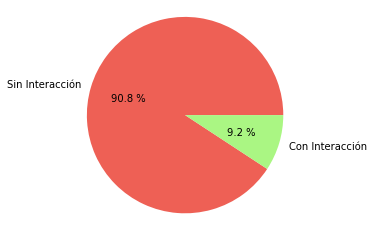

In [80]:
GraficoCorpus(df,"CorpusCompleto")

In [3]:
from itertools import combinations
A = [10, 5, 'Hi']
temp = combinations(A, 2)
for i in list(temp):
    print (i)

(10, 5)
(10, 'Hi')
(5, 'Hi')
